#**2. Read the file mobydick.txt as a full string. Use the spacy library to tokenize and lemmatize words.**

In [1]:
import spacy

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Read the content of the 'mobydick.txt' file
with open('mobydick.txt', 'r', encoding='utf-8') as file:
    text = file.read()

**(a) Use spaCy to process the file and apply processing steps (lower case, remove stop words, and punctuation marks)**

In [2]:
len(text)

1210513

In [3]:
# Set a higher value for nlp.max_length (adjust as needed)
nlp.max_length = 1500000  # You can increase this value based on your text's length

**(b) Extract the list of unique tokens/terms and their frequency, sort, and print**

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

Total number of terms: 115065

Most frequent 20 terms and their frequencies:

: 16036


: 2451
whale: 1420
man: 767
like: 642
ship: 605
sea: 512
ahab: 498
boat: 470
old: 453
head: 451
time: 444
ye: 424
come: 397
say: 372
look: 355
long: 354
captain: 341
hand: 340
great: 317

Least frequent 20 terms and their frequencies:
director: 1
gbnewby@pglaf.org: 1
widest: 1
outdated: 1
5,000: 1
irs: 1
paperwork: 1
solicitation: 1
prohibition: 1
donor: 1
international: 1
gratefully: 1
treatment: 1
http://pglaf.org/donate: 1
originator: 1
network: 1
confirm: 1
pg: 1
http://www.gutenberg.org: 1
newsletter: 1


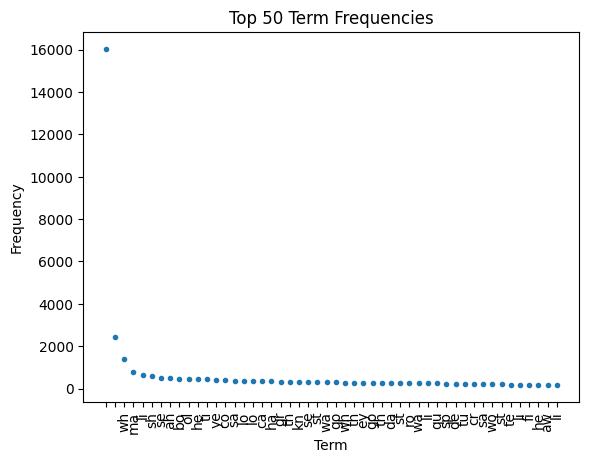

In [5]:

# Use spaCy to process the file and apply processing steps (lower case, remove stop words, and punctuation)
def preprocess_text(text):
    doc = nlp(text)
    processed_tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return processed_tokens

processed_tokens = preprocess_text(text)

# Count the frequency of each token in the processed_tokens list
token_freq = Counter(processed_tokens)

# Sort the dictionary by frequencies from largest to smallest
sorted_token_freq = dict(sorted(token_freq.items(), key=lambda item: item[1], reverse=True))

# Calculate the total number of terms
total_terms = len(processed_tokens)

# Print the total number of terms
print("Total number of terms:", total_terms)

# Print the most frequent 20 terms and their frequencies
print("\nMost frequent 20 terms and their frequencies:")
for term, freq in list(sorted_token_freq.items())[:20]:
    print(f"{term}: {freq}")

# Print the least frequent 20 terms and their frequencies
print("\nLeast frequent 20 terms and their frequencies:")
for term, freq in list(sorted_token_freq.items())[-20:]:
    print(f"{term}: {freq}")

# Plot the 50 largest frequencies
max_length = 50
list_words = list(sorted_token_freq.keys())[:max_length]
list_words_chopped = [w[:2] for w in list_words]

plt.plot(list(sorted_token_freq.values())[:max_length], '.')
plt.xticks(ticks=range(min(max_length, len(sorted_token_freq))), labels=list_words_chopped, rotation=90)
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("Top 50 Term Frequencies")
plt.show()

**(c) Comment on what you observe - how the number of tokens changes as you add more processing steps**

In [6]:
#As you add more processing steps, such as converting text to lowercase, removing stop words, and eliminating punctuation marks, the number of tokens (unique terms) typically decreases. This is because these processing steps filter out non-essential words and reduce the dimensionality of the text data